Goal:

*  Have a look at convolution filters

Task:

*  What do convolution filters do?
    *  https://en.wikipedia.org/wiki/Sobel_operator
    *  https://en.wikipedia.org/wiki/Kernel_(image_processing)


In [4]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve

%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Try fixing up the images so that we can build a hand crafted neural net...

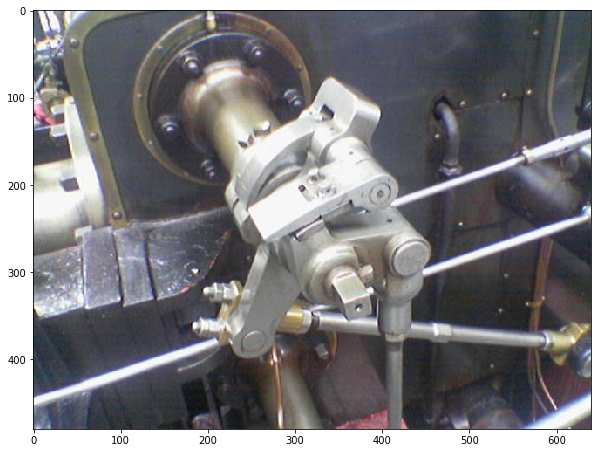

In [39]:
# channels are "R, G, B"
img1 = mpimg.imread('valve1.png')
plt.imshow(img1)

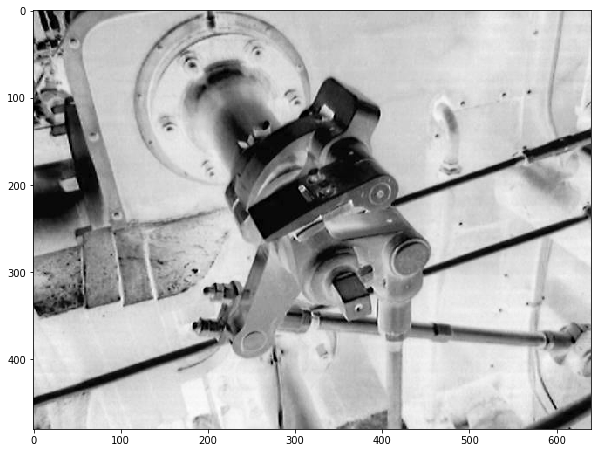

In [40]:
# read channel
rimg = img1[:, :, 0]
plt.imshow(rimg, cmap="Greys")

In [41]:
def run_kernel(img, kernel):
    return convolve(img, kernel)

In [42]:
# lets try convolving some things
k = np.zeros((3,3))
k[1,1] = 1
print("kernel:\n{}".format(k))

kernel:
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


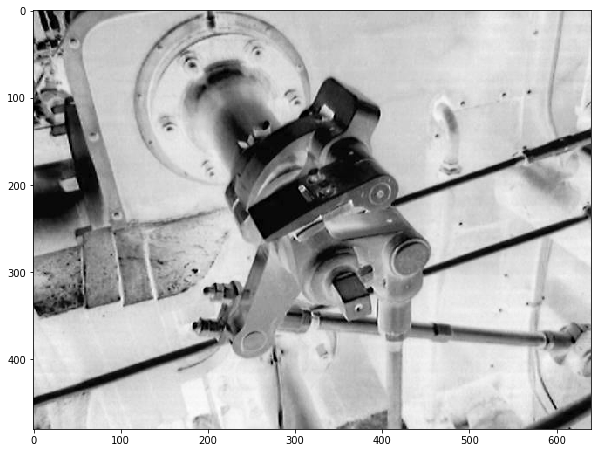

In [43]:
# nothing should happen - identity kernel
plt.imshow(convolve(rimg, k), cmap="Greys")

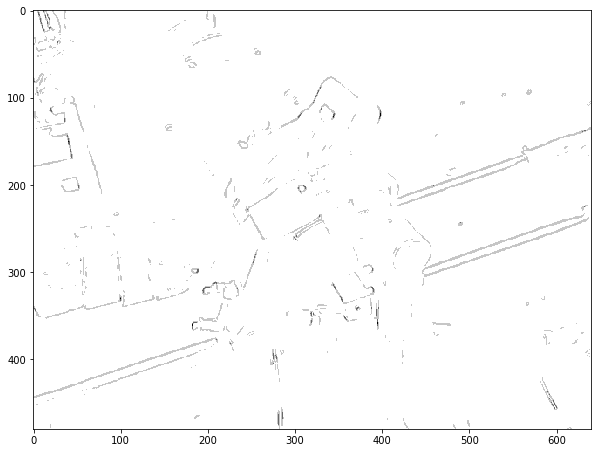

In [47]:
# grayscale
rimg = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

# sobel G_x
k_x = np.array([
[1, 0, -1],
[2, 0, -2],
[1, 0, -1]
])
k_y = np.array([
[1, 2,  1],
[0, 0,  0],
[-1, -2, -1]
])
img_x = run_kernel(rimg, k_x)
img_y = run_kernel(rimg, k_y)
img_both = np.sqrt(np.multiply(img_x, img_x) + np.multiply(img_y, img_y)).astype(np.int8)
plt.imshow(img_both, cmap="Greys")

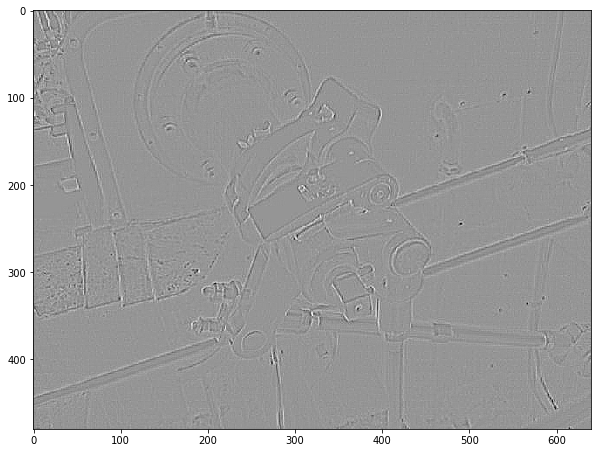

In [48]:
rimg = img1[:, :, 0]

# naive edge detection
k = np.array([
[-1, -1, -1,],
[-1, 8, -1],
[-1, -1, -1]
])
plt.imshow(run_kernel(rimg, k), cmap="Greys")

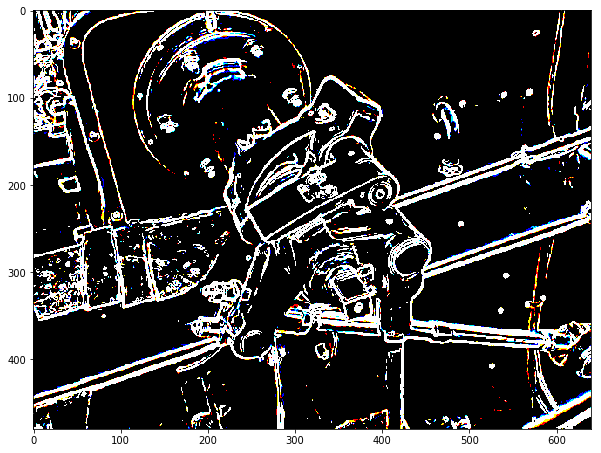

In [66]:
# sobel G_x
k_x = np.array([
[1, 0, -1],
[2, 0, -2],
[1, 0, -1]
])
k_x3 = np.repeat(k_x[:, :, np.newaxis], 3, axis=2)

k_y = np.array([
[1, 2,  1],
[0, 0,  0],
[-1, -2, -1]
])
k_y3 = np.repeat(k_y[:, :, np.newaxis], 3, axis=2)

img_x = run_kernel(img1, k_x3)
img_y = run_kernel(img1, k_y3)
img_both = np.sqrt(np.multiply(img_x, img_x) + np.multiply(img_y, img_y)).astype(np.int8)
plt.imshow(img_both)

In [ ]:
# sobel G_x
k_x = np.array([
[1, 0, -1],
[2, 0, -2],
[1, 0, -1]
])
k_x3 = np.repeat(k_x[:, :, np.newaxis], 3, axis=2)

k_y = np.array([
[1, 2,  1],
[0, 0,  0],
[-1, -2, -1]
])
k_y3 = np.repeat(k_y[:, :, np.newaxis], 3, axis=2)

img_x = run_kernel(img1, k_x3)
img_y = run_kernel(img1, k_y3)
img_both = np.sqrt(np.multiply(img_x, img_x) + np.multiply(img_y, img_y)).astype(np.int8)
plt.imshow(np.sum(img_both, axis=2), cmap='gray')